<a href="https://colab.research.google.com/github/mini3713/mini3713/blob/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%2B%EB%94%A5%EB%9F%AC%EB%8B%9D/XGBoost_03_Bagging_and_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**3 배깅과 랜덤 포레스트**
=======================
배깅과 부스팅의 차이를 이해하고, 랜덤포레스트의 한계를 알아본다

3.1 배깅 앙상블 
====================

> ### 앙상블 방법
> * **앙상블** : 개별 모델의 예측을 합치는 머신러닝 모델
> * 여러 모델의 결과를 연결하기 때문에, 오차를 줄이고 더 나은 성능을 내는 경향 

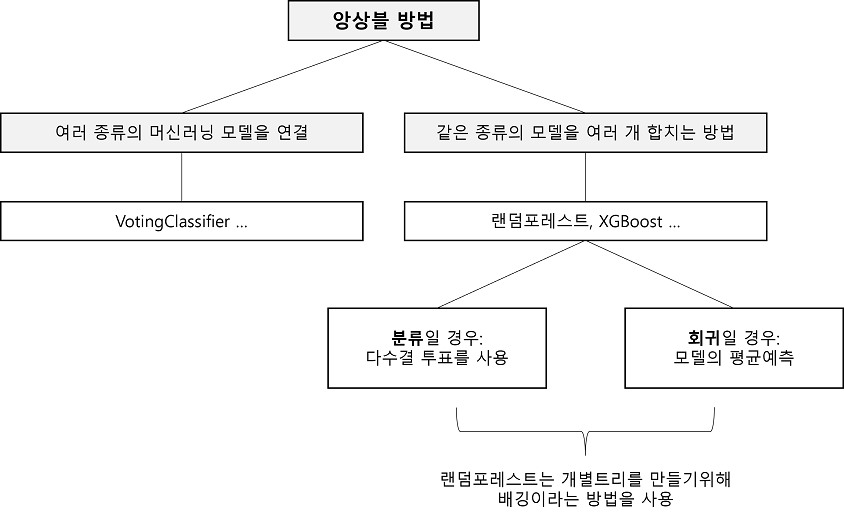

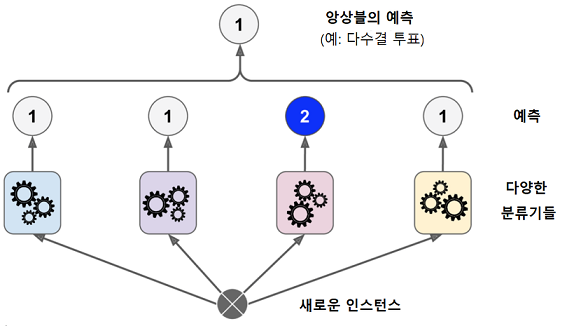

출처 : https://blog.mutti.kr/m/154

> ### 배깅 (bagging)
> * 랜덤포레스트는 **부트스트래핑**을 사용한다.
> * 모든 결정트리가 동일한 샘플로 만들어진다면, 모두 비슷한 예측을 만들며, 앙상블 결과도 개별 트리와 비슷해진다.
> * 하지만 랜덤포레스트를 사용하면 다양한 샘플을 만들어, 많은 종류의 모델을 학습할 수 있다. 
> * 랜덤포레스트처럼 부트스트래핑을 사용하여 결정트리의 예측을 합치는 앙상블 방법을 **배깅**이라고 한다. 

3.2 랜덤 포레스트 살펴보기 
====================

> ### 랜덤 포레스트 분류모델
> * 인구조사 데이터셋을 사용하여 연봉이 5만달러 이상인지 예측

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df_census = pd.read_csv('/content/census_cleaned.csv')
X_census = df_census.iloc[:,:-1]
y_census = df_census.iloc[:,-1]

In [ ]:
X_census.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y_census.head()

0    0
1    0
2    0
3    0
4    0
Name: income_ >50K, dtype: int64

In [ ]:
rf = RandomForestClassifier(n_estimators=10, random_state=2, n_jobs=-1)
scores = cross_val_score(rf, X_census, y_census, cv=5)
print('정확도:', np.round(scores, 3))
print('정확도 평균: %0.3f' % (scores.mean()))

정확도: [0.851 0.844 0.851 0.852 0.851]
정확도 평균: 0.850


> 랜덤포레스트(85%)가 2장의 결정트리(81%)보다 성능이 좋은 이유?
> * 부트스트래핑 샘플을 사용하는 배깅으로 인해 트리의 다양성이 높아지고 분산이 줄어들었기 때문
> * 또한 노드 분할시, 특성 개수의 제곱근을 사용함 (예로 100개의 특성이면, 10개의 특성만 사용)
> * 따라서 다양한 개별 트리가 서로 다른특성을 사용하여 분할하기 때문에 매우 다른 예측을 만들 수 있음  

> ### 랜덤 포레스트 회귀모델
> * 회귀 모델은 노드 분할시 특성 전체를 사용함 
> * 최종 예측은 다수결 투표가 아니라 모든 트리의 예측을 평균함 

In [ ]:
# 자전거 대여 데이터셋
df_bikes = pd.read_csv('/content/bike_rentals_cleaned.csv')
df_bikes.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1.0,0.0,1.0,0.0,6.0,0.0,2,0.344167,0.363625,0.805833,0.160446,985
1,2,1.0,0.0,1.0,0.0,0.0,0.0,2,0.363478,0.353739,0.696087,0.248539,801
2,3,1.0,0.0,1.0,0.0,1.0,1.0,1,0.196364,0.189405,0.437273,0.248309,1349
3,4,1.0,0.0,1.0,0.0,2.0,1.0,1,0.200000,0.212122,0.590435,0.160296,1562
4,5,1.0,0.0,1.0,0.0,3.0,1.0,1,0.226957,0.229270,0.436957,0.186900,1600


In [ ]:
df_bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.682627,1.395349,0.495423,0.474391,0.627908,0.190411,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465773,0.544894,0.183023,0.162938,0.142074,0.077462,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.522291,0.134950,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.627500,0.180971,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.729791,0.233206,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,8714.000000


In [ ]:
X_bikes = df_bikes.iloc[:,:-1]
y_bikes = df_bikes.iloc[:,-1]

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=10, random_state=2, n_jobs=-1)
scores = cross_val_score(rf, X_bikes, y_bikes, scoring='neg_mean_squared_error', cv=10)
rmse = np.sqrt(-scores)
print('RMSE:', np.round(rmse, 3))
print('RMSE 평균: %0.3f' % (rmse.mean()))

RMSE: [ 801.486  579.987  551.347  846.698  895.05  1097.522  893.738  809.284
  833.488 2145.046]
RMSE 평균: 945.365


3.3 랜덤 포레스트 매개변수 
====================

> ### oob_score
> * 선택되지 않고 남아있는 샘플을 테스트 세트로 사용하려면 oob_score=True 로 설정
> * 테스트 점수의 대안으로 활용

In [ ]:
rf = RandomForestClassifier(n_estimators=10, oob_score=True, random_state=2, n_jobs=-1)
rf.fit(X_census, y_census)
rf.oob_score_

0.8343109855348423

> ### n_estimators
> * 많은 트리를 앙상블했을 때 강력한 성능을 발휘
> * 데이터셋이 크면 500개 이상의 트리가 필요할 수 있음 
> * 하지만 어느 한계점을 넘어서면 결국 일정한 수준의 성능을 유지함 

In [ ]:
# 인구조사 데이터셋 활용, n_estimator=50 일 경우
rf = RandomForestClassifier(n_estimators=50, oob_score=True, random_state=2, n_jobs=-1)
rf.fit(X_census, y_census)
rf.oob_score_

0.8518780135745216

In [ ]:
# n_estimator=100 일 경우
rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=2, n_jobs=-1)
rf.fit(X_census, y_census)
rf.oob_score_

0.8551334418476091

> ### warm_start
> * warm_start=True 로 지정하면, n_estimator를 100에서 200으로 변경시 처음부터 200개의 트리를 다시 만들지 않고 이전 모델에 이어서 트리를 추가

In [ ]:
# 50부터 500까지 50개씩 트리를 증가시키면서 OOB 점수를 그래프화
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
oob_scores = []
rf = RandomForestClassifier(n_estimators=50, warm_start=True, oob_score=True, n_jobs=-1, random_state=2)
rf.fit(X_census, y_census)
oob_scores.append(rf.oob_score_)

In [ ]:
est = 50
estimators = [est]
for i in range(9):
  est += 50  # 반복마다 est에 50씩 추가
  estimators.append(est)
  rf.set_params(n_estimators=est)
  rf.fit(X_census, y_census)
  oob_scores.append(rf.oob_score_)

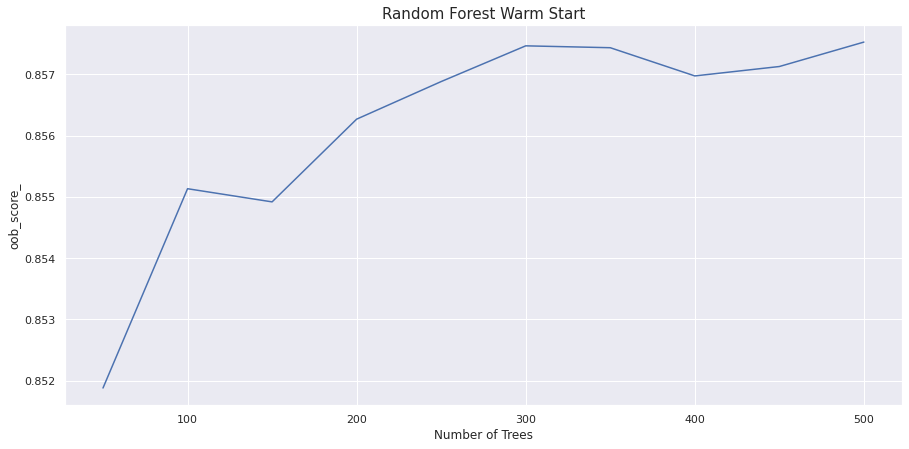

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(estimators, oob_scores)
plt.xlabel('Number of Trees')
plt.ylabel('oob_score_')
plt.title('Random Forest Warm Start', fontsize=15)
plt.show()
# 트리개수 300에서 점수가 가장 높음, 300개 이상은 비용과 시간낭비이며 이득이 크지않음 

3.4 랜덤 포레스트 성능 높이기 - 사례연구
====================
> 자전거 대여회사의 날씨, 시간, 일자 데이터로 일별 대여 횟수를 예측  
> 초반의 랜덤포레스트 회귀 모델로 얻은 RMSE 945점보다 낮은 점수를 얻는것이 목표

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_bikes, y_bikes, random_state=2)

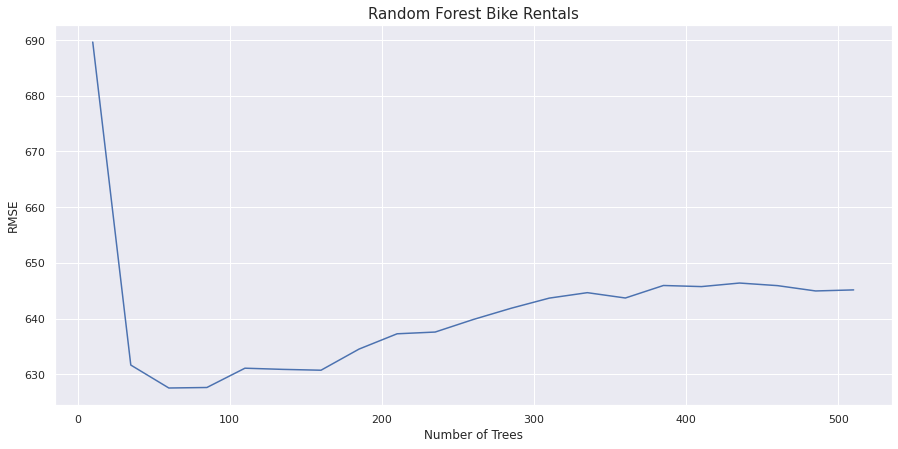

In [ ]:
from sklearn.metrics import mean_squared_error
rmse_scores = []
estimators = []
rf = RandomForestRegressor(warm_start=True, n_jobs=-1, random_state=2)
# 트리시작 개수
est = 10

for i in range(21):
  rf.set_params(n_estimators=est)
  rf.fit(X_train, y_train)
  rmse = mean_squared_error(y_test, rf.predict(X_test), squared=False)
  rmse_scores.append(rmse)
  estimators.append(est)
  est += 25

plt.figure(figsize=(15,7))
plt.plot(estimators, rmse_scores)
plt.xlabel('Number of Trees')
plt.ylabel('RMSE')
plt.title('Random Forest Bike Rentals', fontsize=15)
plt.show()

In [ ]:
# n_estimator=50 
rf = RandomForestRegressor(n_estimators=50, warm_start=True, n_jobs=-1, random_state=2)
scores = cross_val_score(rf, X_bikes, y_bikes, scoring='neg_mean_squared_error', cv=10)
rmse = np.sqrt(-scores)
print('RMSE:', np.round(rmse, 3))
print('RMSE 평균: %0.3f' % (rmse.mean()))
# 점수는 더 향상되었음, 마지막 폴드의 에러가 매우 높은데 이는 데이터의 오류나 이상치때문일 가능성이 있다

RMSE: [ 836.482  541.898  533.086  812.782  894.877  881.117  794.103  828.968
  772.517 2128.148]
RMSE 평균: 902.398


In [ ]:
# 하이퍼파라미터 튜닝
# 최상의 매개변수와 RMSE, 평균점수를 출력하는 함수 생성
from sklearn.model_selection import RandomizedSearchCV
def randomized_search_reg(params, runs=16, reg=RandomForestRegressor(random_state=2, n_jobs=-1)):
  rand_reg = RandomizedSearchCV(reg, params, n_iter=runs, scoring='neg_mean_squared_error', cv=10, n_jobs=-1, random_state=2)
  rand_reg.fit(X_train, y_train)
  best_model = rand_reg.best_estimator_
  best_params = rand_reg.best_params_
  print("최상의 매개변수:", best_params)
  best_score = np.sqrt(-rand_reg.best_score_)
  print("훈련 점수: {:.3f}".format(best_score))
  y_pred = best_model.predict(X_test)
  from sklearn.metrics import mean_squared_error as MSE
  rmse_test = MSE(y_test, y_pred)**0.5
  print('테스트 세트 점수: {:.3f}'.format(rmse_test))

In [ ]:
randomized_search_reg(
    params={'min_weight_fraction_leaf':[0.0, 0.0025, 0.005, 0.0075, 0.01, 0.05],
            'min_samples_split':[2, 0.01, 0.02, 0.03, 0.04, 0.06, 0.08, 0.1],
            'min_samples_leaf':[1, 2, 4, 6, 8, 10, 20, 30],
            'min_impurity_decrease': [0.0, 0.01, 0.05, 0.10, 0.15, 0.2],
            'max_leaf_nodes':[10, 15, 20, 25, 30, 35, 40, 45, 50, None],
            'max_features':['auto', 0.8, 0.7, 0.6, 0.5, 0.4],
            'max_depth':[None, 2, 4, 6, 8, 10, 20]
            }
)

최상의 매개변수: {'min_weight_fraction_leaf': 0.0, 'min_samples_split': 0.03, 'min_samples_leaf': 6, 'min_impurity_decrease': 0.05, 'max_leaf_nodes': 25, 'max_features': 0.7, 'max_depth': None}
훈련 점수: 759.076
테스트 세트 점수: 701.802


In [ ]:
# 탐색범위를 더 좁혀보기 
randomized_search_reg(
    params={'min_samples_leaf':[1, 2, 4, 6, 8, 10, 20, 30],
            'min_impurity_decrease': [0.0, 0.01, 0.05, 0.10, 0.15, 0.2],
            'max_features':['auto', 0.8, 0.7, 0.6, 0.5, 0.4],
            'max_depth':[None, 2, 4, 6, 8, 10, 20]
            }
)

최상의 매개변수: {'min_samples_leaf': 1, 'min_impurity_decrease': 0.1, 'max_features': 0.6, 'max_depth': 10}
훈련 점수: 679.052
테스트 세트 점수: 626.541


In [ ]:
# 탐색 횟수를 늘리고 max_depth 옵션을 더 추가
randomized_search_reg(
    params={'min_samples_leaf':[1, 2, 4, 6, 8, 10, 20, 30],
            'min_impurity_decrease': [0.0, 0.01, 0.05, 0.10, 0.15, 0.2],
            'max_features':['auto', 0.8, 0.7, 0.6, 0.5, 0.4],
            'max_depth':[None, 4, 6, 8, 10, 12, 15, 20]
            }
)

최상의 매개변수: {'min_samples_leaf': 1, 'min_impurity_decrease': 0.1, 'max_features': 0.6, 'max_depth': 12}
훈련 점수: 675.128
테스트 세트 점수: 619.014


In [ ]:
# 탐색 범위를 더 좁혀보기
randomized_search_reg(
    params={'min_samples_leaf':[1, 2, 3, 4, 5, 6],
            'min_impurity_decrease': [0.0, 0.01, 0.05, 0.08, 0.10, 0.12, 0.15],
            'max_features':['auto', 0.8, 0.7, 0.6, 0.5, 0.4],
            'max_depth':[None, 8, 10, 12, 14, 16, 18, 20]
            }
)

최상의 매개변수: {'min_samples_leaf': 1, 'min_impurity_decrease': 0.05, 'max_features': 0.7, 'max_depth': 18}
훈련 점수: 679.595
테스트 세트 점수: 630.954


In [ ]:
# n_estimators를 증가
randomized_search_reg(
    params={'min_samples_leaf':[1, 2, 4, 6, 8, 10, 20, 30],
            'min_impurity_decrease': [0.0, 0.01, 0.05, 0.10, 0.15, 0.2],
            'max_features':['auto', 0.8, 0.7, 0.6, 0.5, 0.4],
            'max_depth':[None, 4, 6, 8, 10, 12, 15, 20],
            'n_estimators':[100]
            }, runs=20
)

최상의 매개변수: {'n_estimators': 100, 'min_samples_leaf': 1, 'min_impurity_decrease': 0.1, 'max_features': 0.6, 'max_depth': 12}
훈련 점수: 675.128
테스트 세트 점수: 619.014


In [ ]:
rf = RandomForestRegressor(n_estimators=100, min_impurity_decrease=0.1, max_features=0.6, max_depth=12, n_jobs=-1, random_state=2)
scores = cross_val_score(rf, X_bikes, y_bikes, scoring='neg_mean_squared_error', cv=10)
rmse = np.sqrt(-scores)
print('RMSE:', np.round(rmse, 3))
print('RMSE 평균: %0.3f' % (rmse.mean()))

RMSE: [ 818.354  514.173  547.392  814.059  769.54   730.025  831.376  794.634
  756.83  1595.237]
RMSE 평균: 817.162


In [ ]:
# 마지막 분할에 문제가 있는것을 확인
# 데이터를 섞어서 모델을 성능을 개선
from sklearn.utils import shuffle
df_shuffle_bikes = shuffle(df_bikes, random_state=2)
X_shuffle_bikes = df_shuffle_bikes.iloc[:,:-1]
y_shuffle_bikes = df_shuffle_bikes.iloc[:,-1]
rf = RandomForestRegressor(n_estimators=100, min_impurity_decrease=0.1, max_features=0.6, max_depth=12, n_jobs=-1, random_state=2)
scores = cross_val_score(rf, X_shuffle_bikes, y_shuffle_bikes, scoring='neg_mean_squared_error', cv=10)
rmse = np.sqrt(-scores)
print('RMSE:', np.round(rmse, 3))
print('RMSE 평균: %0.3f' % (rmse.mean()))

RMSE: [630.093 686.673 468.159 526.676 593.033 724.575 774.402 672.63  760.253
 616.797]
RMSE 평균: 645.329


> ### 랜덤 포레스트의 단점
> * 랜덤 포레스트는 모든 트리가 동일한 실수를 저지르면 랜덤 포레스트도 실수를 한다.
> * 개별 트리가 해결할 수 없는 데이터 내의 문제 때문에 랜덤 포레스트의 성능이 향상될 수 없다. 
> * 그래디언트 부스팅은 트리의 실수로부터 배워서 초반의 단점을 개선할 수 있다. 